In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from aqua import Reader
from aqua.graphics import plot_vertical_profile, plot_vertical_profile_diff

In [19]:
reader = Reader(model="IFS-NEMO", exp="historical-1990", source="lra-r100-monthly") 
data = reader.retrieve()
data

2025-09-03 17:49:06 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-09-03 17:49:06 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data
ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'


<xarray.Dataset> Size: 19GB
Dimensions:    (time: 146, lat: 180, lon: 360, level: 75, plev: 19)
Coordinates:
  * time       (time) datetime64[ns] 1kB 1990-01-01 1990-02-01 ... 2002-02-01
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * level      (level) float64 600B 0.5058 1.556 2.668 ... 5.698e+03 5.902e+03
    idx_level  (level) int64 600B dask.array<chunksize=(75,), meta=np.ndarray>
  * plev       (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Data variables: (12/36)
    2t         (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    hc700m     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    siconc     (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    sithick    (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    so         (time, level, lat, lon) float64 6GB dask.array<chunksize=(12, 75, 180, 360), meta=np.ndarray>
    sos        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ...         ...
    t          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
    tcc        (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tciw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tclw       (time, lat, lon) float64 76MB dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    u          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(9, 19, 180, 360), meta=np.ndarray>
    v          (time, plev, lat, lon) float64 1GB dask.array<chunksize=(12, 19, 180, 360), meta=np.ndarray>
Attributes:
    history:  \n2025-09-03 17:49:14 AQUA💧: Retrieved from IFS-NEMO_historical...

We now load a 3d variable like `q`, and plot its vertical profile.

In [21]:
data=data['q'].isel(time=1).mean('lon')
data

<xarray.DataArray 'q' (plev: 19, lat: 180)> Size: 27kB
dask.array<mean_agg-aggregate, shape=(19, 180), dtype=float64, chunksize=(19, 180), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 8B 1990-02-01
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * plev     (plev) float64 152B 1e+05 9.25e+04 8.5e+04 ... 1e+03 500.0 100.0
Attributes: (12/28)
    GRIB_paramId:                    133
    long_name:                       Specific humidity
    GRIB_stepUnits:                  1
    GRIB_gridDefinitionDescription:  150
    GRIB_typeOfLevel:                isobaricInhPa
    standard_name:                   specific_humidity
    ...                              ...
    cfVarName:                       q
    AQUA_model:                      IFS-NEMO
    AQUA_exp:                        historical-1990
    AQUA_source:                     lra-r100-monthly
    AQUA_catalog:                    climatedt-phase1
    AQUA_version:                    0.18.0-alpha

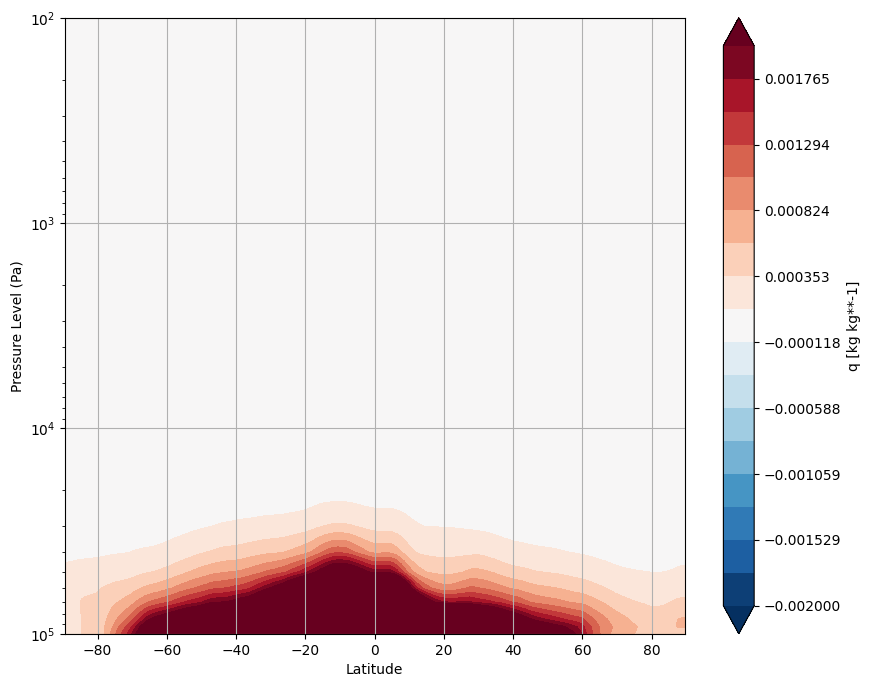

In [22]:
plot_vertical_profile(data=data, var='q', vmin=-0.002, vmax=0.002, logscale=True)
                        

we can also compare two datasets through the 'plot_vertical_profile' method. The 'add contour' option allows to overlay contour lines from the main dataset.

In [28]:
reader = Reader(model="ERA5", exp="era5", source="monthly") 
data_ref = reader.retrieve()
data_ref = data_ref['q'].isel(time=1).mean('lon')

ECCODES ERROR   :  concept: no match for shortName=cprea
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'
ECCODES ERROR   :  concept: no match for shortName=sisnthick
ECCODES ERROR   :  concept: input handle edition=2, centre=0
ECCODES ERROR   :  Please check the Parameter Database 'https://codes.ecmwf.int/grib/param-db/'


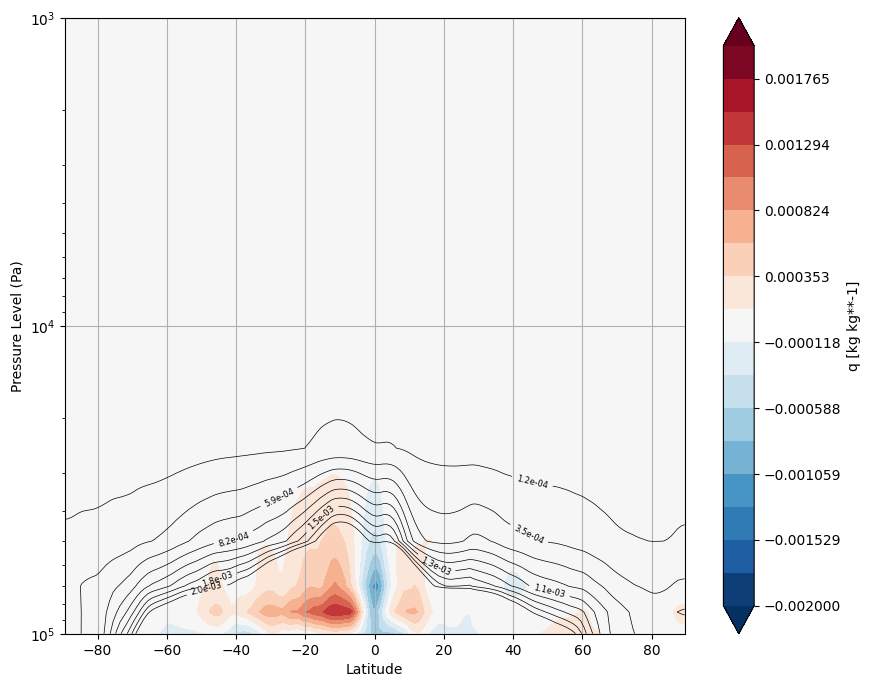

In [30]:
plot_vertical_profile_diff(data=data, data_ref=data_ref, var='q', 
                           vmin=-0.002, vmax=0.002, 
                           vmin_contour=-0.002, vmax_contour=0.002, 
                           logscale=True, add_contour=True)
